In [1]:
import torch
from d2l import torch as d2l

###  Multiple Input Channels

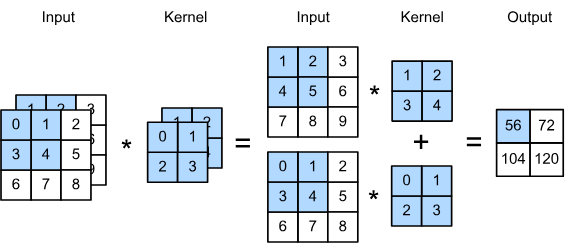

In [2]:
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [3]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])

K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
# X.shape >>> torch.Size([2, 3, 3])
# K.shape >>> torch.Size([2, 2, 2])
corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### Multiple Output Channels

In [4]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

We construct a trivial convolution kernel with 3 output channels by concatenating the kernel tensor for K with K+1 and K+2.

In [5]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [6]:
corr2d_multi_in_out(X, K).shape

torch.Size([3, 2, 2])